## LAB: K-Means Clustering

As an unsupervised data analysis technique, clustering organises data objects by proximity based on variables and helps to create natural groupings for a set of data objects. By grouping data one can understand how each data point relates to the other points and discover groups of similar points. 

When the groups are formed, we can also define each group's centroid - the ideal data object that minimises the sum of the distances to each of the data points in the cluster. By analysing these centroids' variables we will be able to define each cluster in terms of its characteristics.

In this notebook, we will be working with data regarding deaths from infectious tuberculosis in each country from 1990 to 2007. The data is available on the [gapminder website](http://www.gapminder.org/data/) which is a comprehensive resource for data regarding different countries and territories. In the dataset we will be working with, each sample is a country and each variable is a year. 

KMeans clustering divides a set of data objects into k clusters, assigning each observation to a cluster so as to minimize the distance of that observation (in n-dimensional space) to the cluster’s mean; the means are then recomputed. This operation is run iteratively until the clusters converge, for a maximum of number of iterations chosen. Given a target number, k, of clusters to find, it will locate the centers of each of those k clusters and the boundaries between them. It does this using the following algorithm:

1. Start with a randomly selected set of k centroids (the supposed centers of the k clusters)
2. Determine which observation is in which cluster, based on which centroid it is closest to (using the squared Euclidean distance: ∑pj=1(xij−xi′j)2  where p is the number of dimensions)
3. Re-calculate the centroids of each cluster by minimizing the squared Euclidean distance to each observation in the cluster
4. Repeat steps 2 and 3 until the members of the clusters (and hence the positions of the centroids) no longer change.

In [1]:
import pandas as pd

# thousands in below code line is to separate thousands if any in the data
# index_col tells python to use the specified column as the row labels of the DataFrame. 

tb_deaths_per_100k = pd.read_csv("./tb_deaths_per_100k.csv",index_col = 0, thousands  = ',')

# Give the index column the name 'country' 
tb_deaths_per_100k.index.names = ['country']

# Give the column names row the name 'year' 
tb_deaths_per_100k.columns.names = ['year']
tb_deaths_per_100k

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 19
country,,,,,,,,,,,,,,,,,,,
Afghanistan,50.0,49.0,48.0,47.0,47.0,46.0,46.0,45.0,43.0,43.0,41.0,39.0,36.0,37.0,34.0,33.0,31.0,30.0,NaN
Albania,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,NaN
Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
American Samoa,5.0,2.0,0.0,2.0,2.0,2.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN
Andorra,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,NaN
Yemen,18.0,17.0,18.0,17.0,17.0,16.0,16.0,15.0,14.0,13.0,12.0,12.0,12.0,11.0,11.0,10.0,10.0,10.0,NaN
Zambia,126.0,153.0,182.0,203.0,218.0,229.0,238.0,247.0,250.0,258.0,255.0,274.0,156.0,138.0,137.0,138.0,128.0,115.0,NaN


An extra row of NANs' is introduced in the lats row of dataframe. Get rid of that row using pandas indexing as shown below. Also get rid of the extra column "Unnames: 19" that is introduced at the end. 


Please go through below reference link to understand how pandas dataframes are indexed

**Reference: ** [Indexing, Slicing and Subsetting DataFrames in Python](http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/02-index-slice-subset.html)

In [2]:
# Exclude last row of data. The index -1 will exclude last row from dataframe
tb_deaths_per_100k = tb_deaths_per_100k[:-1]

# Exclude last column with NANs' using the column name
del tb_deaths_per_100k["Unnamed: 19"]

In [3]:
tb_deaths_per_100k

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,50.0,49.0,48.0,47.0,47.0,46.0,46.0,45.0,43.0,43.0,41.0,39.0,36.0,37.0,34.0,33.0,31.0,30.0
Albania,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
Algeria,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
American Samoa,5.0,2.0,0.0,2.0,2.0,2.0,0.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Andorra,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,15.0,40.0,7.0,19.0,19.0,10.0,10.0,12.0,10.0,10.0,11.0,2.0,28.0,12.0,5.0,4.0,7.0,3.0
West Bank and Gaza,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
Yemen,18.0,17.0,18.0,17.0,17.0,16.0,16.0,15.0,14.0,13.0,12.0,12.0,12.0,11.0,11.0,10.0,10.0,10.0


Kmeans takes set of data points and clusters them in specified number of groups. The data here has 18 variables. We will use PCA to reduce the dimensions of the data. PCA is a statistical procedure that uses a transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. Python's sklearn machine learning library comes with a PCA implementation. 

For very large dimensional data, normal PCA implementation may not work. In that case we could consider Apache Spark's dimensionality reduction feature that was explored in the Database Analytics course last semester. In this case, there are just 18 variables. It's a small feature set for today's machine learning libraries and computer capabilities, so we are ok. 

We will specify in advance the number of principal components we want to use and call the fit() method on the dataframe to learn the principal components. Then we use transform() to project each row of the dataframe into the principal component vector space that was learned by fit(). 

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(tb_deaths_per_100k)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [5]:
deaths_pca = pca.transform(tb_deaths_per_100k)

Create a dataframe using the two principal components generated.  

In [6]:
# Create a dataframe with the two principal components generated. 
deaths_pca_df = pd.DataFrame(deaths_pca)

# Assign the index of the dataframe "tb_deaths_per_100" to this new dataframe we created from PCA components. 
# tb_deaths_per_100 has country names as its indexes. So they both
# will have same indexes now.

deaths_pca_df.index = tb_deaths_per_100k.index

# Rename the column names of deaths_pca_df to something meaningful. 
deaths_pca_df.columns = ['PC1','PC2']
deaths_pca_df.head()

,PC1,PC2
country,,
Afghanistan,51.817943,-41.930763
Albania,-99.541156,8.694757
Algeria,-108.470846,11.361761
American Samoa,-110.172725,8.275184
Andorra,-105.472595,8.233806


You can look at explained variance ratio by each principal component as follows.

In [7]:
print(pca.explained_variance_ratio_) 

[0.90647563 0.05727867]


The first component explains over 90% of the variance, while the second one accounts for nearly 6% for a total of almost 96% between the two of them.

Now that a lower dimensionality version of data is ready, call the plot function on the data frame, by passing the kind of plot you want and what columns correspond to each axis. The for loop below adds an annotation to tag `country` with a point.

**References: ** 

- [enumerate()](https://docs.python.org/3/library/functions.html#enumerate): Enumerate allows us to loop over a list and have an automatic counter. 


- [Dataframe.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html): Plot returns an Axes object matplotlib.AxesSubplot. The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. Axes can be used annotate points as showed below in the for loop. In the code below ax is an instance of Axes.




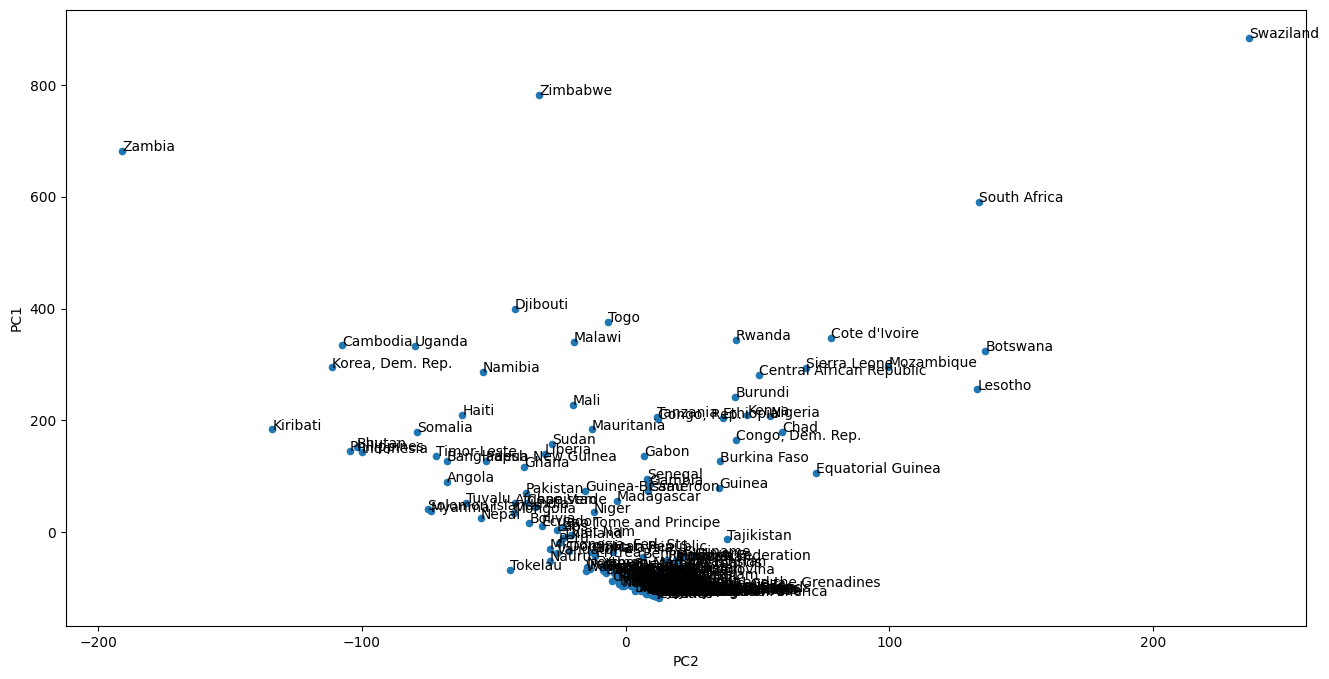

In [8]:
%matplotlib inline

# dataframe.plot() returning axes  matplotlib.AxesSubplot which is used later to add more elements to the plot. 
ax = deaths_pca_df.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))


# The loop is iterating over deaths_pca_df.index which is countries. The variable i will have counter for the iteration 
# and country will have the value.
for i, country in enumerate(deaths_pca_df.index):
    ax.annotate(country, (deaths_pca_df.iloc[i].PC2, deaths_pca_df.iloc[i].PC1))
    

# Show country for every xy combination in dataset which is essentially the 208 countries in the dataset.

Create a bubble chart, by setting the point size to a value proportional to the mean value for all the years in that particular country. First of all, a new column containing the re-scaled mean per country across all the years shuld be added.


**Reference:**

- [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html#pandas-dataframe-mean): Return the mean of the values for the requested axis

You can also get the same reference information using help():

In [9]:
help(pd.DataFrame.mean)

Help on function mean in module pandas.core.frame:

mean(self, axis: 'Axis | None' = 0, skipna: 'bool' = True, numeric_only: 'bool' = False, **kwargs)
    Return the mean of the values over the requested axis.

    Parameters
    ----------
    axis : {index (0), columns (1)}
        Axis for the function to be applied on.
        For `Series` this parameter is unused and defaults to 0.

        For DataFrames, specifying ``axis=None`` will apply the aggregation
        across both axes.

        .. versionadded:: 2.0.0

    skipna : bool, default True
        Exclude NA/null values when computing the result.
    numeric_only : bool, default False
        Include only float, int, boolean columns. Not implemented for Series.

    **kwargs
        Additional keyword arguments to be passed to the function.

    Returns
    -------
    Series or scalar

                Examples
                --------
                >>> s = pd.Series([1, 2, 3])
                >>> s.mean()
              

In [10]:
# from sklearn.preprocessing import normalize

# Here you are creating a new column called "country_mean" in deaths_pca_df which is going to have mean values of deaths 
# in each country
deaths_pca_df['country_mean'] = pd.Series(tb_deaths_per_100k.mean(axis=1), index=tb_deaths_per_100k.index)

# Use the min() and max() functions on country_mean column so we can normalize it
country_mean_max = deaths_pca_df['country_mean'].max()
country_mean_min = deaths_pca_df['country_mean'].min()


# Create a new column for normalized death values in each country. 
country_mean_scaled = (deaths_pca_df.country_mean-country_mean_min) / country_mean_max

deaths_pca_df['country_mean_scaled'] = pd.Series(country_mean_scaled, index=deaths_pca_df.index) 
deaths_pca_df.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,51.817943,-41.930763,41.388889,0.186297
Albania,-99.541156,8.694757,4.166667,0.018755
Algeria,-108.470846,11.361761,2.000000,0.009002
American Samoa,-110.172725,8.275184,1.722222,0.007752
Andorra,-105.472595,8.233806,2.833333,0.012753


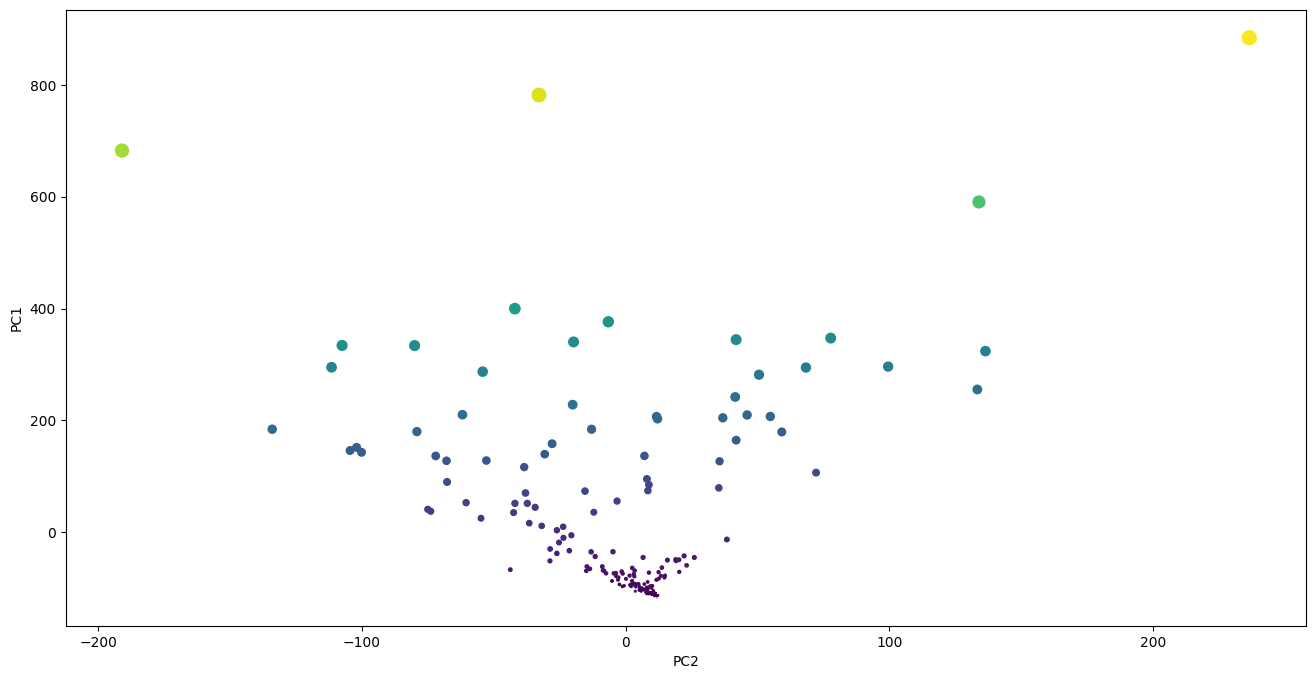

In [11]:
# When kind = ‘scatter’ and the argument c is the name of a dataframe column, 
# the values of that column are used to color each point. Similarly argument s is used to determine the size of the point

ax = deaths_pca_df.plot(kind='scatter', x='PC2', y='PC1', s=deaths_pca_df['country_mean_scaled']*100, figsize=(16,8), 
                        c=deaths_pca_df['country_mean_scaled'])

The above plots suggest that most variation happens along the y axis which is PC1. At the bottom of the chart there is a concentration of countries that are mostly developed. When ascending the axis, the number of countries becomes more sparse and they belong to less developed regions of the world.

When the points are coloured and sized using the magnitude average, the directions also correspond to a variation in these magnitudes.

PCA did tell us something about the data - how it is varying overall in the dataset. We still don't know the relationships between countries. We will use k-means clustering to group countries based on how similar their situation has been year-by-year. Then we will use cluster assignment to colour code the previous scatter plot that we generated.

When using k-means, the most important thing to do is to determine the right number of groups for the data. This can be done more or less accurately by iterating through different values for the number of groups and comparing an amount called the within-cluster sum of square distances for each iteration. This is the squared sum of distances to the cluster center for each cluster member. Of course this distance is minimal when the number of clusters gets equal to the number of samples, but we don't want to get there. We normally stop when the improvement in this value starts decreasing at a lower rate.

##### silhouette score

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object lies within its cluster (wikipedia.org). The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. It will tell us what the optimum number of clusters is for the given data. 

**References: **
- [sklearn.metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
- <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Silhouette (clustering)</a>

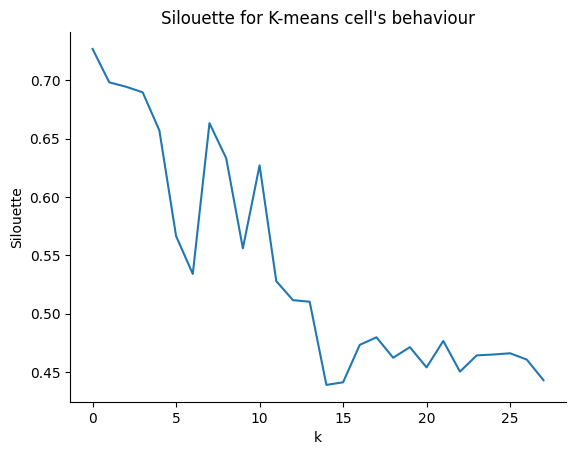

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# An empty list to store silhouette values for different number of clusters
s = []

# For loop to calculate silhouette value with cluster number ranging from 2 to 30.  
for n in range(2,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(deaths_pca_df)

    labels = kmeans.labels_
    
    # centroids will have Coordinates of cluster centers
    centroids = kmeans.cluster_centers_
    
    # Calculate silhouette score and append the score to s
    s.append(silhouette_score(deaths_pca_df, labels, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

The silhouette ranges from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. Silhouette value just gives an idea on picking the number of clusters. Human intervention is needed for finally choosing the number of clusters. So we need to choose an optimum value. From clusters 1 to 5, the score is above average that is $\ge 0.65$. So lets start with 2 clusters and do trials until 5.

**First**, however, consider the range of silhouette scores (-1,1) and the plot above. You can see it's a **common distortion** anti-pattern in visualization, because the Y axis is constrainted by actual values.  To set the visualization to abide by the range allowed by a silhouette score, use this command: 

> plt.ylim(-1, 1)

And then, try again, below. 

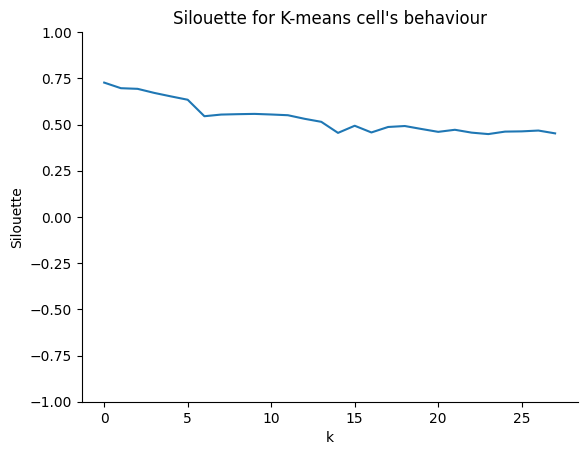

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# An empty list to store silhouette values for different number of clusters
s = []

# For loop to calculate silhouette value with cluster number ranging from 2 to 30.  
for n in range(2,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(deaths_pca_df)

    labels = kmeans.labels_
    
    # centroids will have Coordinates of cluster centers
    centroids = kmeans.cluster_centers_
    
    # Calculate silhouette score and append the score to s
    s.append(silhouette_score(deaths_pca_df, labels, metric='euclidean'))

plt.plot(s)
plt.ylim(-1, 1)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()




You can see in the properly scaled plot above that there is not a wide difference in silhouette scores for different k values for this dataset. We will continue with our plan to look at the k values with above-average silhouette scores. First for k=2:

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(tb_deaths_per_100k)

deaths_pca_df['cluster'] = pd.Series(clusters.labels_, index=deaths_pca_df.index)

If we were using R, we would use ggplot for our visualizations. The library for Python known as ggplot uses the same syntax as the R ggplot library, but is not a product of the same team as the original R ggplot, and has become buggy with the evolution of Pandas by not keeping up with breaking changes.

Therefore, we'll use the [seaborn library](https://seaborn.pydata.org/) to graph our clusters. 

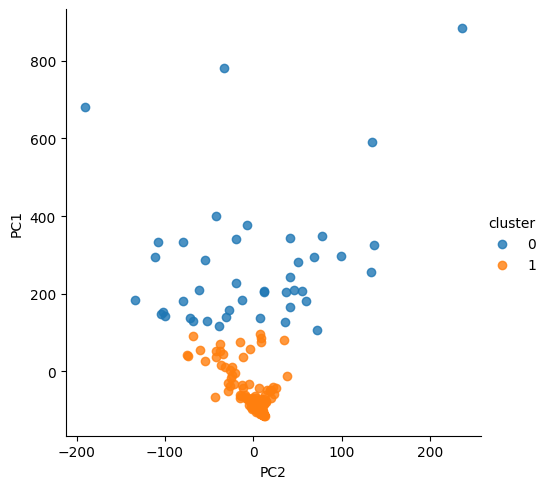

In [15]:
import numpy as np
import seaborn as sns

sns.lmplot(x='PC2', y='PC1', data=deaths_pca_df,
          fit_reg=False, # No regression line
          hue='cluster')   # Color by cluster

Visually, we can see there is a pretty clear separation between the two clusters, although the cluster at the top is rather dispersed. Let's check how many points are in each.

In [16]:
tab = deaths_pca_df.groupby(['cluster']).size()
tab

cluster
0     43
1    164
dtype: int64

We can see that one cluster contains 164 countries and the other contains 43 countries, a reasonable separation. There is no expectation that the clusters will have similar numbers, but we don't like to see clusters with small numbers of points, especially singletons. We can also take a look at the countries in each cluster.

In [17]:
print('shape: ',deaths_pca_df.loc[deaths_pca_df['cluster']==0].shape)
print("\n")
deaths_pca_df[deaths_pca_df['cluster'] == 0].index.tolist()

shape:  (43, 5)




['Bangladesh',
 'Bhutan',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Central African Republic',
 'Chad',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Korea, Dem. Rep.',
 'Congo, Dem. Rep.',
 'Djibouti',
 'Equatorial Guinea',
 'Ethiopia',
 'Gabon',
 'Ghana',
 'Haiti',
 'Indonesia',
 'Kenya',
 'Kiribati',
 'Lesotho',
 'Liberia',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Nigeria',
 'Papua New Guinea',
 'Philippines',
 'Rwanda',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'Sudan',
 'Swaziland',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Tanzania',
 'Zambia',
 'Zimbabwe']

In [18]:
print('shape: ',deaths_pca_df.loc[deaths_pca_df['cluster']==1].shape)
print("\n")
deaths_pca_df[deaths_pca_df['cluster'] == 1].index.tolist()

shape:  (164, 5)




['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gambia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazak

The clusters look OK at least when you go skim through the list of countries. 

Let's repeat our anlaysis with n=3, 4, and 5.

### Repeat with clusters=3

In [19]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(tb_deaths_per_100k)


Store the cluster assignments together with each country in data frame. The cluster labels are returned in clusters.labels_.

In [20]:
deaths_pca_df['cluster'] = pd.Series(clusters.labels_, index=deaths_pca_df.index)

And now we are ready to plot, using the cluster column as color.

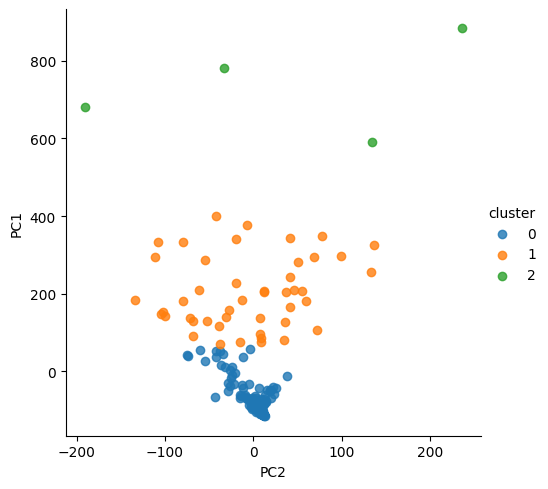

In [21]:
sns.lmplot(x='PC2', y='PC1', data=deaths_pca_df,
          fit_reg=False, 
          hue='cluster')   

In [22]:
tab = deaths_pca_df.groupby(['cluster']).size()
tab

cluster
0    157
1     46
2      4
dtype: int64

We can see the widely dispersed points have been separated out into their own cluster, and the other points are separated into two clusters in a slightly different way than when n-2. The clusters are well defined.

### Repeat with clusters=4

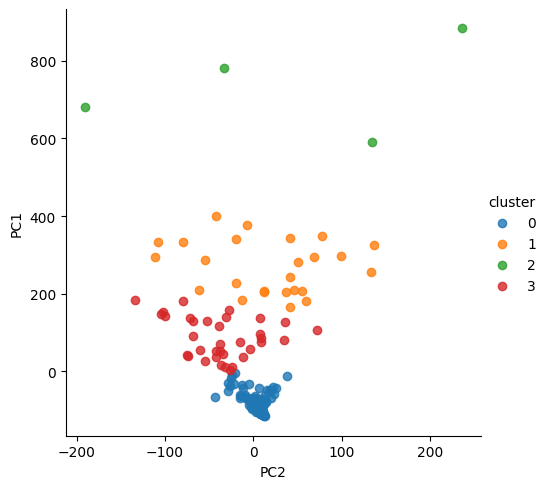

In [23]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(tb_deaths_per_100k)

deaths_pca_df['cluster'] = pd.Series(clusters.labels_, index=deaths_pca_df.index)

sns.lmplot(x='PC2', y='PC1', data=deaths_pca_df,
          fit_reg=False, 
          hue='cluster')  

In [24]:
tab = deaths_pca_df.groupby(['cluster']).size()
tab

cluster
0    143
1     25
2      4
3     35
dtype: int64

This is similar to n=3, separating the main mass into three well-defined clusters.

### Repeat with clusters=5

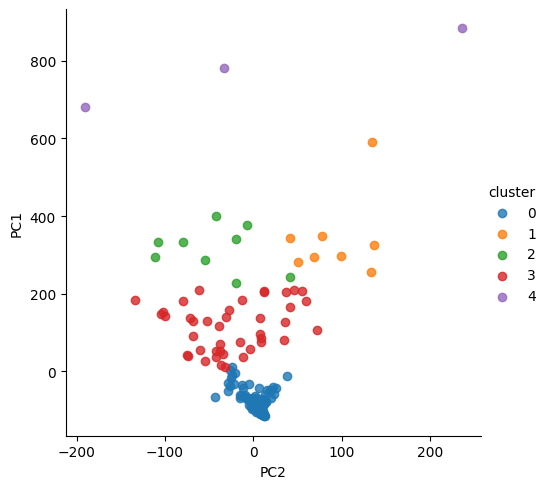

In [25]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(tb_deaths_per_100k)
centroids = kmeans.cluster_centers_

deaths_pca_df['cluster'] = pd.Series(clusters.labels_, index=deaths_pca_df.index)

sns.lmplot(x='PC2', y='PC1', data=deaths_pca_df,
          fit_reg=False, 
          hue='cluster')   

In [26]:
tab = deaths_pca_df.groupby(['cluster']).size()
tab

cluster
0    145
1      8
2      9
3     42
4      3
dtype: int64

This continues the pattern we've already seen of dividing the main mass of points into horizontally layered, fairly well-defined clusters. We can see that there isn't a big difference in how well defined the clusters are, as they have fairly close silouhette scores. How high would we want to go for k? In this case, our data is rather small - 208 observations - so we want to avoid large k. What would happen if we used say, k = 15? 

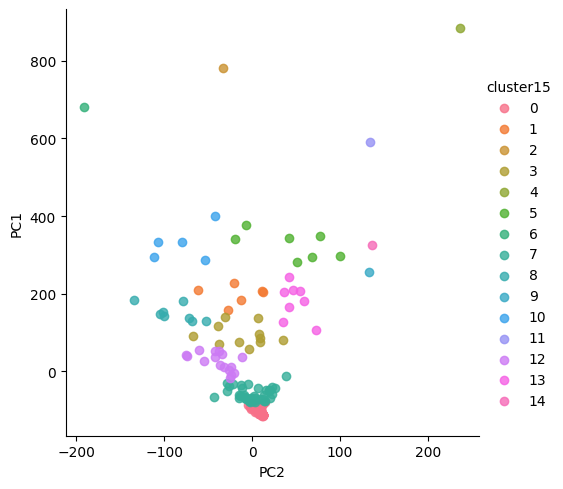

In [27]:
#we want to use k=5 over again, so we'll use unique variable and column names for k=15
kmeans15 = KMeans(n_clusters=15)
clusters15 = kmeans15.fit(tb_deaths_per_100k)
centroids15 = kmeans15.cluster_centers_

deaths_pca_df['cluster15'] = pd.Series(clusters15.labels_, index=deaths_pca_df.index)

sns.lmplot(x='PC2', y='PC1', data=deaths_pca_df,
          fit_reg=False, 
          hue='cluster15')  

In [28]:
tab = deaths_pca_df.groupby(['cluster15']).size()
tab

cluster15
0     99
1      6
2      1
3     11
4      1
5      7
6      1
7     41
8      8
9      1
10     5
11     1
12    16
13     8
14     1
dtype: int64

For k= 15, in addition to noticing it is hard to distinguish the variations in color, there are five singletons and 1 pair and the clusters don't seem to make as much sense.

There isn't a big difference in k = 2, 3, 4, and 5. Which k do you think is the best? 

##### Interpreting cluster assignments

Look at Cluster 0 for k=5. We'll check how many countries are in it, what they are, and find the coordinates of the centroid of the cluster by accessing as centroids[0].

Note: if you re-run the code, which cluster is assigned to which index may change.

In [29]:
#re-run k=5
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(tb_deaths_per_100k)
centroids = kmeans.cluster_centers_

#get the dimensions and the countries
print(deaths_pca_df.loc[deaths_pca_df['cluster']==0].shape)
deaths_pca_df[deaths_pca_df['cluster'] == 0].index.tolist()

(145, 6)


['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bosnia and Herzegovina',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Libyan Arab Jamahiriya',
 'Lithuania',
 'Luxembourg',
 'Malay

In [30]:
# These array of values are the coordinates for centroid of cluster 0 in our 18-dimensional space
centroids[0]

array([7.67832168, 7.71328671, 7.42657343, 7.44755245, 7.1958042 ,
       7.53846154, 6.90909091, 7.17482517, 7.02097902, 7.09090909,
       6.3006993 , 6.28671329, 6.97902098, 6.1048951 , 6.0979021 ,
       5.81118881, 5.85314685, 5.60839161])

Cluster 1:

In [31]:
print(deaths_pca_df.loc[deaths_pca_df['cluster']==1].shape)
deaths_pca_df[deaths_pca_df['cluster'] == 1].index.tolist()

(8, 6)


['Botswana',
 'Central African Republic',
 "Cote d'Ivoire",
 'Lesotho',
 'Mozambique',
 'Rwanda',
 'Sierra Leone',
 'South Africa']

In [32]:
# These array of values are the coordinates for centroid of cluster 1 in our 18-dimensional space
centroids[1]

array([ 60.  ,  65.52,  69.48,  73.88,  77.8 ,  81.68,  78.44,  81.32,
        86.  ,  97.36,  94.72,  99.16, 104.88, 109.72, 109.56, 109.76,
       106.96, 110.52])

Cluster 2:

In [33]:
print('shape: ',deaths_pca_df.loc[deaths_pca_df['cluster']==2].shape)
print("\n")
deaths_pca_df[deaths_pca_df['cluster'] == 2].index.tolist()

shape:  (9, 6)




['Burundi',
 'Cambodia',
 'Korea, Dem. Rep.',
 'Djibouti',
 'Malawi',
 'Mali',
 'Namibia',
 'Togo',
 'Uganda']

In [34]:
# These array of values are the coordinates for centroid of cluster 2  in our 18-dimensional space
centroids[2]

array([54.77142857, 54.05714286, 53.4       , 53.02857143, 52.68571429,
       52.22857143, 51.05714286, 50.45714286, 49.62857143, 50.28571429,
       50.42857143, 49.17142857, 47.17142857, 46.11428571, 43.74285714,
       43.34285714, 42.34285714, 43.28571429])

Cluster 3:

In [35]:
print('shape: ',deaths_pca_df.loc[deaths_pca_df['cluster']==3].shape)
print("\n")
deaths_pca_df[deaths_pca_df['cluster'] == 3].index.tolist()

shape:  (42, 6)




['Afghanistan',
 'Angola',
 'Bangladesh',
 'Bhutan',
 'Bolivia',
 'Burkina Faso',
 'Cameroon',
 'Cape Verde',
 'Chad',
 'Congo, Rep.',
 'Congo, Dem. Rep.',
 'Ecuador',
 'Equatorial Guinea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'India',
 'Indonesia',
 'Kenya',
 'Kiribati',
 'Liberia',
 'Madagascar',
 'Mauritania',
 'Mongolia',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Philippines',
 'Senegal',
 'Solomon Islands',
 'Somalia',
 'Sudan',
 'Timor-Leste',
 'Tuvalu',
 'Tanzania']

In [36]:
# These array of values are the coordinates for centroid of cluster 3  in our 18-dimensional space
centroids[3]

array([ 79.,  83.,  86.,  96., 113., 137., 163., 200., 240., 324., 362.,
       415., 237., 239., 277., 309., 322., 317.])

Cluster 4:

In [37]:
print('shape: ',deaths_pca_df.loc[deaths_pca_df['cluster']==4].shape)
print("\n")
deaths_pca_df[deaths_pca_df['cluster'] == 4].index.tolist()

shape:  (3, 6)




['Swaziland', 'Zambia', 'Zimbabwe']

In [38]:
# These array of values are the coordinates for centroid of cluster 4  in our 18-dimensional space
centroids[4]

array([114.66666667, 130.66666667, 146.66666667, 169.33333333,
       180.        , 190.        , 201.        , 211.        ,
       178.33333333, 180.66666667, 207.66666667, 228.        ,
       188.66666667, 206.        , 207.66666667, 216.66666667,
       209.33333333, 203.33333333])

In [57]:
c4 = deaths_pca_df[deaths_pca_df['cluster'] == 4].index.tolist()
print(c4)
print(deaths_pca_df)
c4_df = deaths_pca_df[deaths_pca_df['cluster'] == 4][['country_mean_scaled']]
print(c4_df)

['Swaziland', 'Zambia', 'Zimbabwe']
                           PC1         PC2  country_mean  country_mean_scaled  \
country                                                                         
Afghanistan          51.817943  -41.930763     41.388889             0.186297   
Albania             -99.541156    8.694757      4.166667             0.018755   
Algeria            -108.470846   11.361761      2.000000             0.009002   
American Samoa     -110.172725    8.275184      1.722222             0.007752   
Andorra            -105.472595    8.233806      2.833333             0.012753   
...                        ...         ...           ...                  ...   
Wallis et Futuna    -68.723684  -14.881706     12.444444             0.056014   
West Bank and Gaza  -99.534735    6.365769      4.277778             0.019255   
Yemen               -61.096844   -8.800919     13.833333             0.062266   
Zambia              682.342815 -190.925159    191.388889             0.86

In [60]:
print(c4_df.columns)

Index(['country_mean_scaled'], dtype='object')


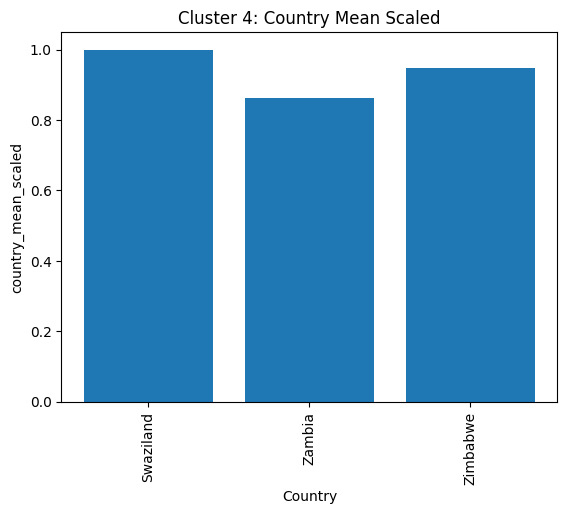

In [61]:
plt.bar(c4_df.index, c4_df['country_mean_scaled'])
plt.xticks(rotation=90)
plt.title("Cluster 4: Country Mean Scaled")
plt.ylabel("country_mean_scaled")
plt.xlabel("Country")
plt.show()